In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date

In [ ]:
cust_demo=pd.read_excel("/content/Raw_data.xlsx", sheet_name='CustomerDemographic')

In [ ]:
cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [ ]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [ ]:
cust_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [ ]:
cust_demo.drop(labels='default',axis = 1,inplace = True)

In [ ]:
cust_demo.isnull().mean()*100

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
dtype: float64

In [ ]:
cust_demo[cust_demo['last_name'].isnull()][['first_name','customer_id']].isnull().sum()

first_name     0
customer_id    0
dtype: int64

In [ ]:
cust_demo['last_name'].fillna('None',axis=0,inplace =True)

In [ ]:
dob_index_drop=cust_demo[cust_demo['DOB'].isnull()].index
dob_index_drop

Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  525,  547,  581,
        598,  679,  684,  798,  838,  882,  891,  949,  974,  982,  995, 1037,
       1043, 1081, 1173, 1209, 1243, 1350, 1476, 1508, 1582, 1627, 1682, 1739,
       1772, 1779, 1805, 1917, 1937, 1989, 1999, 2020, 2068, 2164, 2204, 2251,
       2294, 2334, 2340, 2413, 2425, 2468, 2539, 2641, 2646, 2695, 2696, 2853,
       2919, 2962, 2998, 3011, 3085, 3150, 3221, 3222, 3254, 3287, 3297, 3311,
       3321, 3342, 3364, 3472, 3509, 3512, 3564, 3653, 3717, 3726, 3778, 3882,
       3930, 3934, 3997],
      dtype='int64')

In [ ]:
cust_demo.drop(index = dob_index_drop,inplace=True,axis=0)

In [ ]:
cust_demo['DOB'].isnull().sum()

0

In [ ]:
cust_demo[cust_demo['job_title'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3,4,Talbot,None,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7.0
5,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,N,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23 00:00:00,NaN,Financial Services,Affluent Customer,N,Yes,11.0
10,11,Uriah,Bisatt,Male,99,1954-04-30 00:00:00,NaN,Property,Mass Customer,N,No,9.0
21,22,Deeanne,Durtnell,Female,79,1962-12-10 00:00:00,NaN,IT,Mass Customer,N,No,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3968,Alexandra,Kroch,Female,99,1977-12-22 00:00:00,NaN,Property,High Net Worth,N,No,22.0
3971,3972,Maribelle,Schaffel,Female,6,1979-03-28 00:00:00,NaN,Retail,Mass Customer,N,No,8.0
3978,3979,Kleon,Adam,Male,67,1974-07-13 00:00:00,NaN,Financial Services,Mass Customer,N,Yes,18.0
3986,3987,Beckie,Wakeham,Female,18,1964-05-29 00:00:00,NaN,Argiculture,Mass Customer,N,No,7.0


In [ ]:
cust_demo['job_title'].fillna('Missing',inplace=True,axis=0)

In [ ]:
cust_demo['DOB']=pd.to_datetime(cust_demo['DOB'])

In [ ]:
from datetime import date
def age(born):
  today = datetime.today()
  lived = today.year - born.year
  return lived
cust_demo['Age'] = cust_demo['DOB'].apply(age)

In [ ]:
cust_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                                0
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
Age                                      0
dtype: int64

In [ ]:
cust_demo['job_industry_category'].fillna('Missing',inplace=True,axis=0)

<Figure size 2000x800 with 0 Axes>

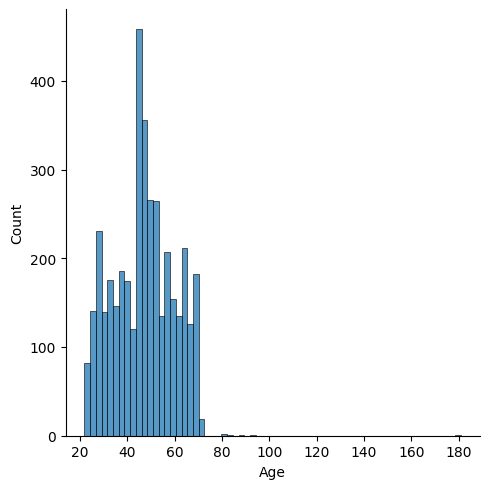

In [ ]:
plt.figure(figsize=(20,8))
sns.displot(cust_demo['Age'],kde=False)

In [ ]:
cust_demo['Age'].describe()

count    3913.000000
mean       46.969333
std        12.796387
min        22.000000
25%        37.000000
50%        47.000000
75%        56.000000
max       181.000000
Name: Age, dtype: float64

In [ ]:
age_index_group = cust_demo[cust_demo['Age']>100].index
cust_demo.drop(index=age_index_group,inplace=True,axis=0)

In [ ]:
cust_demo['Age'].describe()

count    3912.000000
mean       46.935072
std        12.617249
min        22.000000
25%        37.000000
50%        47.000000
75%        56.000000
max        93.000000
Name: Age, dtype: float64

In [ ]:
cust_demo['gender'].value_counts()

gender
Female    2037
Male      1872
F            1
Femal        1
M            1
Name: count, dtype: int64

In [ ]:
def replace_gender_names(gender):
  if gender=='M':
    return 'Male'
  elif gender == 'F':
    return 'Female'
  elif gender == 'Femal':
    return 'Female'
cust_demo['gender'] = cust_demo['gender'].apply(replace_gender_names)

In [ ]:
cust_demo_dupped = cust_demo.drop('customer_id',axis=1)
print("total number of rows(records) after removing customer_id(pk) from dataset {}".format(cust_demo_dupped.shape[0]))
print("total number of rows(records) before removing customer_id(pk) from dataset {}".format(cust_demo.shape[0]))

total number of rows(records) after removing customer_id(pk) from dataset 3912
total number of rows(records) before removing customer_id(pk) from dataset 3912


In [ ]:
cust_demo.to_csv('CustomerDemographic_Cleaned.csv', index=False)